# Лабораторная работа №3 
# "Применение однофакторного дисперсионного анализа"
## Лапшиной Анны АТМ-22-01

## Часть 1. Проверка гипотезы о нормальном распределении

### Даны данные наработки на отказ технического средства: <br>
`[9, 9, 11, 9, 9, 11, 9, 7, 9, 6, 9, 6, 9, 11, 9, 7, 9, 7, 10, 7, 9, 10, 6, 10, 8, 6, 9, 8, 8, 8, 8, 7, 8, 7, 7, 8, 9, 11, 9, 9, 8, 10, 9, 8, 10, 8, 8, 9, 11, 9]`<br>
### Требуется определить: можно ли считать закон распределения экспериментальных данных нормальным

### Статистические характеристики гипотезы о нормальности распределения данных - оценки параметров распределения

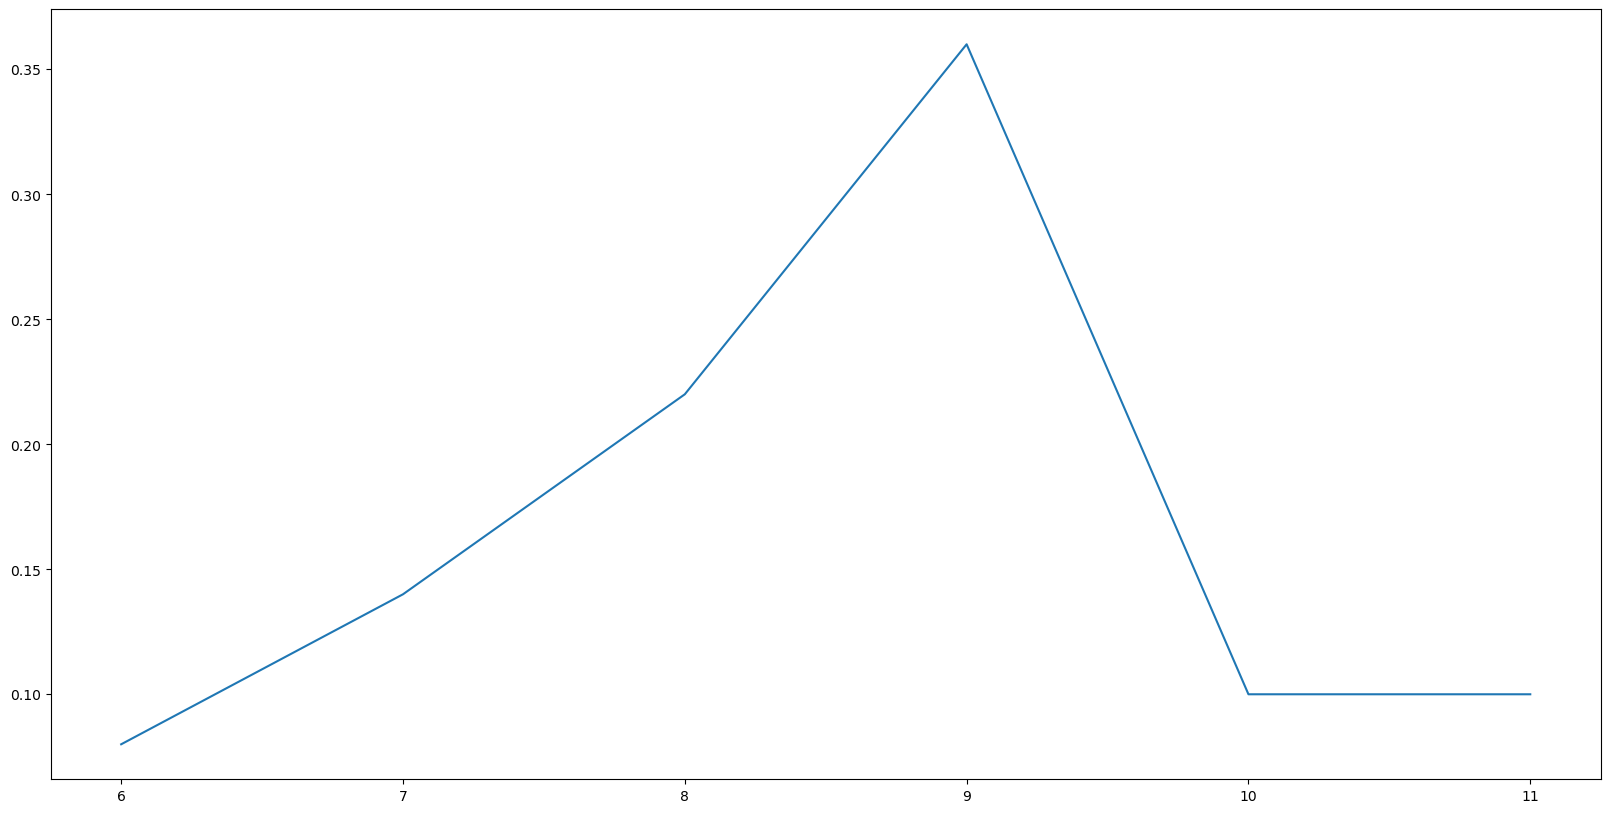

In [4]:
import statistics
import numpy as np
import matplotlib.pyplot as plt
from math import log10, pi, exp

#чтение выборки из файла
with open("lab3.txt") as f:
    for line in f:
        my_list = [int(x) for x in line.split()]
# print(len(my_list))

#распределение частот
freq = {}
for item in sorted(my_list):
    try:
        freq[item] = freq[item] + 1
    except Exception:
        freq[item] = 1
x = []
y = []
for c,d in freq.items():
    x.append(c)
    y.append(d)
y = np.array(y)/len(my_list)
plt.figure(figsize=(20,10))
plt.plot(x, y)

<function matplotlib.pyplot.show(close=None, block=None)>

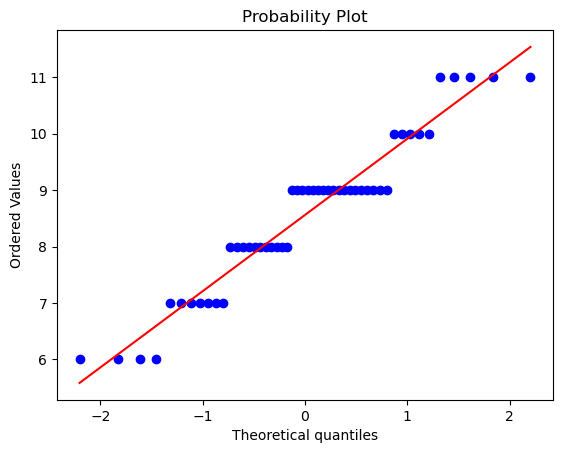

In [3]:
import pylab
import scipy.stats as stats
stats.probplot(my_list, dist='norm', plot = pylab)
pylab.show

### H0: результаты наблюдений подчиняются нормальному закону распределения
### H1: результаты наблюдений не подчиняются нормальному закону распределения

In [7]:
print('Мат. ожидание равно',statistics.mean(my_list))
print('Дисперсия равна',np.var(my_list))

Мат. ожидание равно 8.56
Дисперсия равна 1.8064000000000002


In [30]:
#Размах варьирования признака
R = max(my_list) - min(my_list)
print('R =', R)

#Число групп по формуле Стерджесса
m = 1 + 3.32*log10(len(my_list))
print('m =', int(m))

#Величина интервала 
i = R/int(m)
print('i =', round(i,3))
my_dict = {}
x0 = min(my_list)
mo = 0

#Количество элементов в интервалах, оценка мат.ожидания 
count = 0
for j in range(int(m)):
    x1 = x0 + i
    for item in sorted(my_list):
        if (x0 <= item) & (item < x1):
            count += 1
    my_dict[f'{round(x0,3)}-{round(x1,3)}'] = count
    mo += ((x0 + x1)/2 * count)/ len(my_list)
    count = 0
    x0 = x1
print(my_dict)            
print('Оценка мат.ожидания', mo)  


#Оценка СКО
summ_sko = 0
x0 = min(my_list)
for j in range(int(m)):
    x1 = x0 + i
    for item in sorted(my_list):
        if (x0 <= item) & (item < x1):
            count += 1
    summ_sko += ((((x0 + x1)/2) - mo)**2) * count
    count = 0
    x0 = x1
sko = (summ_sko / len(my_list))**(1/2)
print('Оценка СКО', round(sko,3))

R = 5
m = 6
i = 0.833
{'6-6.833': 4, '6.833-7.667': 7, '7.667-8.5': 11, '8.5-9.333': 18, '9.333-10.167': 5, '10.167-11.0': 5}
Оценка мат.ожидания 8.55
Оценка СКО 1.12


### Критерий согласия Пирсона


In [33]:
x0 = min(my_list)
frequencies = []
for k,v in my_dict.items():
    #Эмпирическая частота
    freq_emp = v
    #Теоретическая частота
    x1 = x0 + i
    n = len(my_list)
    t = ((x0 + x1)/2 - mo)/sko  #нормируем с.в.
    p = 1/((2*pi)**(1/2))*exp(-(t**2)/2)    #вероятность попадания в интервал
    freq_teor = n*i/sko*p
    x0 = x1
    frequencies.append((freq_emp, round(freq_teor,3)))
print('Эмпирическая и теоретическая частота', *frequencies)

Эмпирическая и теоретическая частота (4, 2.419) (7, 7.567) (11, 13.607) (18, 14.067) (5, 8.36) (5, 2.856)


### Интервалы с частотой  5 и меньше объединяем с соседними

In [36]:
frequencies_2 = [(frequencies[0][0]+frequencies[1][0], round(frequencies[0][1]+frequencies[1][1],3)), frequencies[2],frequencies[3],(frequencies[4][0]+frequencies[5][0], frequencies[4][1]+frequencies[5][1])]
print('Обновленные частоты', *frequencies_2)

Обновленные частоты (11, 9.986) (11, 13.607) (18, 14.067) (10, 11.216)


In [47]:
#Критерий Пирсона
pir = 0
for freq_emp,freq_teor in frequencies_2:
    pir += ((freq_emp - freq_teor)**2)/freq_teor
print('Критерий Пирсона', round(pir,3))    


Критерий Пирсона 1.834


### Ищем по таблице значение критического значения при уровне значимости 95% для одной степени свободы:<br>
`t_kr = 3.84`<br>

In [38]:
t_kr = 3.84
if pir > t_kr:
    print('Нулевая гипотеза отвергается, распределение нельзя считать нормально распределенным')
else:
    print('Нулевая гипотеза принимается, распределение распределенно нормально')

Нулевая гипотеза принимается, распределение распределенно нормально


## Часть 2.  Применение однофакторного дисперсионного анализа

### Даны участки нефтепроводов, находящиеся в различных климатических зонах: <br>
`Зона 1 = [70.5, 71.8, 69.8, 58.9, 68.7, 72.1, 70.3, 69.1, 72, 58.7, 66.2]
Зона 2 = [58.9, 59.1, 60.1, 62.2, 60.5, 58.4, 59, 61.8]
Зона 3 = [54.2, 58.8, 56.6, 55, 56.4]`<br>
- Факторный признак - климатические зоны
-  Результативный признак - протяженность зоны
### Требуется установить: сущетсвует ли зависимость между климатическими условиями и протяженностью участка с 95% значимостью

### H0: Климатические условия не влияют на величину протяженности участка нефтепровода
### H1: Климатические условия существенно влияют на величину протяженности участка нефтепровода

In [75]:
import statistics
import scipy.stats as stats
zona_1 = [70.5, 71.8, 69.8, 58.9, 68.7, 72.1, 70.3, 69.1, 72, 58.7, 66.2]
zona_2 = [58.9, 59.1, 60.1, 62.2, 60.5, 58.4, 59, 61.8]
zona_3 = [54.2, 58.8, 56.6, 55, 56.4]

alpha = 0.05
zones = []
zones.append(zona_1)
zones.append(zona_2)
zones.append(zona_3)
# print(zones)

#Средние значения для интервалов
means = []
for i in range(len(zones)):
    means.append(statistics.mean(zones[i]))
    print('Среднее для', i+1, 'участка', round(means[i],3))
    
#Средние значения для всей выборки
s = 0
n = 0
for el in zones:
    for elem in el:
        s += elem
        n += 1        
mean_0 = s/n 
print('Среднее для всех участков', round(mean_0,3))

#Межгрупповая дисперсия
s = 0
for i in range(len(zones)):
   s += ((means[i] - mean_0)**2) * len(zones[i])
S_delta = s/2
print ('S_delta = ', round(S_delta,3)) 

#Внутригрупповая дисперсия
s = 0
for el in zones:
    for elem in el:
        s += (elem - statistics.mean(el))**2
S = s / (n - len(zones))  
print ('S = ', round(S,3))   

#Отношение дисперсий
F = S_delta / S
print ('F = ', round(F,3)) 

#Проверка по критерию Фишера
# F_t = 3.467
F_t = round(stats.f.ppf(1-alpha, 2, 21),3)
print(f'Табличное критическое значение критерия Фишера = {F_t}')
if F > F_t:
    print('Нулевая гипотеза отвергается, климатические условия существенно влияют на величину протяженности нефтепровода')
else:
    print('Нулевая гипотеза принимается, климатические условия не влияют на величину протяженности нефтепровода')    

Среднее для 1 участка 68.009
Среднее для 2 участка 60.0
Среднее для 3 участка 56.2
Среднее для всех участков 62.879
S_delta =  289.425
S =  12.504
F =  23.146
Табличное критическое значение критерия Фишера = 3.467
Нулевая гипотеза отвергается, климатические условия существенно влияют на величину протяженности нефтепровода
